In [1]:
import numpy as np 
import pandas as pd 
bounds = np.asarray([(0.0, 87.0), (0.0,11.0)]).T 
ITERATION = 2

In [2]:
comps = np.load('./data/comps_%d.npy'%ITERATION)
volumes = comps[:,0]
times = comps[:,1]
n_samples = len(comps)

In [3]:
Z2 = np.round(volumes.reshape(-1,1)).astype(int)
Hepes = np.array([54]*n_samples).reshape(-1,1)
Z2M246I = np.array([87]*n_samples).reshape(-1,1)
Au = np.array([13]*n_samples).reshape(-1,1)
array = np.hstack((Hepes, Z2M246I, Au, Z2))
water = 280 - np.sum(array, axis=1).reshape(-1,1)
volume_array = np.hstack((water, array))
volume_df = pd.DataFrame(volume_array, columns=['Water', 'HEPES', 'Z2M246I', 'Au', 'Z2'])
volume_df

,Water,HEPES,Z2M246I,Au,Z2
0,126,54,87,13,0
1,69,54,87,13,57
2,81,54,87,13,45
3,106,54,87,13,20
4,58,54,87,13,68
5,72,54,87,13,54
6,74,54,87,13,52
7,97,54,87,13,29


In [4]:
DT1 = np.array([0]*n_samples).reshape(-1,1)
DT2 = np.array([0]*n_samples).reshape(-1,1)
DT3 = np.array([0]*n_samples).reshape(-1,1)
DT4 = np.round(times.reshape(-1,1)).astype(int)
time_array = np.hstack((DT1, DT2, DT3, DT4))
time_df = pd.DataFrame(time_array, columns=['DT1', 'DT2', 'DT3', 'DT4'])
time_df

,DT1,DT2,DT3,DT4
0,0,0,0,5
1,0,0,0,11
2,0,0,0,6
3,0,0,0,7
4,0,0,0,0
5,0,0,0,8
6,0,0,0,2
7,0,0,0,2


In [5]:
volume_df.to_csv('./opentrons/volumes_%d.csv'%(ITERATION),index=False)
time_df.to_csv('./opentrons/times_%d.csv'%(ITERATION),index=False)

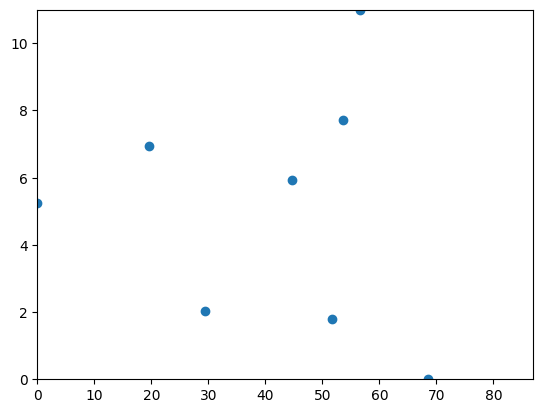

In [6]:
import matplotlib.pyplot as plt 

fig, ax = plt.subplots()
ax.scatter(volumes, times)
ax.set_xlim([bounds[0,0], bounds[1,0]])
ax.set_ylim([bounds[0,1], bounds[1,1]])
plt.show()